<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-0.1">Importing Libraries</a></span></li><li><span><a href="#Importing-the-dataset" data-toc-modified-id="Importing-the-dataset-0.2">Importing the dataset</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-Data---Target" data-toc-modified-id="Distribution-of-Data---Target-0.2.1">Distribution of Data - Target</a></span></li><li><span><a href="#Steps-to-clean-the-data" data-toc-modified-id="Steps-to-clean-the-data-0.2.2">Steps to clean the data</a></span></li></ul></li><li><span><a href="#Pre-process-Text" data-toc-modified-id="Pre-process-Text-0.3">Pre-process Text</a></span></li><li><span><a href="#Word-Cloud" data-toc-modified-id="Word-Cloud-0.4">Word Cloud</a></span></li><li><span><a href="#Split-Data" data-toc-modified-id="Split-Data-0.5">Split Data</a></span></li><li><span><a href="#TF-IDF" data-toc-modified-id="TF-IDF-0.6">TF-IDF</a></span></li><li><span><a href="#CountVectorizer" data-toc-modified-id="CountVectorizer-0.7">CountVectorizer</a></span></li></ul></li><li><span><a href="#Word-Embedding-using-Word2Vec" data-toc-modified-id="Word-Embedding-using-Word2Vec-1">Word Embedding using Word2Vec</a></span><ul class="toc-item"><li><span><a href="#MLP-Classifier-in-Keras" data-toc-modified-id="MLP-Classifier-in-Keras-1.1">MLP Classifier in Keras</a></span></li><li><span><a href="#Hyperparameter-Tuning-using-GridSearch" data-toc-modified-id="Hyperparameter-Tuning-using-GridSearch-1.2">Hyperparameter Tuning using GridSearch</a></span><ul class="toc-item"><li><span><a href="#Random-Forest---Hyperparameter-Tuning" data-toc-modified-id="Random-Forest---Hyperparameter-Tuning-1.2.1">Random Forest - Hyperparameter Tuning</a></span></li></ul></li></ul></li></ul></div>

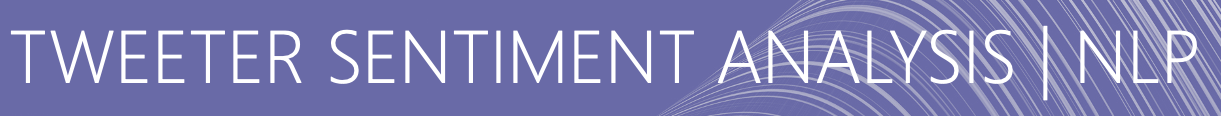

### Importing Libraries

In [1]:
# Import Sklearn libraries to build models 
from sklearn.feature_extraction.text import TfidfVectorizer #  TF-IDF to vectorize words 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
# Import Libraries to perform computation and do visualization. 
import pandas as pd
import numpy as np
np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
import string

# Import nltk to check english lexicon.
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet, stopwords
from nltk import word_tokenize, FreqDist
from nltk import pos_tag # for Parts of Speech tagging
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Generate wordcloud for word distribution visualization.
from wordcloud import WordCloud 

# Generating random numbers.
import random 

from xgboost import XGBClassifier

# Transforms text to a fixed-length vector of integers.
from gensim.models import Word2Vec 

import os

import textdistance
#Efficient functions to search in strings.
import re as re 

# Import images for world cloud.
from PIL import Image, ImageDraw, ImageFont 


# # Keras
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
# from keras import utils
# from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Import Yellowbrick and vector coupon for visualization of frequent words
 
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

from tqdm.notebook import tqdm

from os import path
from os import environ

### Importing the dataset

In [2]:
DATASET_COLUMNS=["sentiment", "ids", "date", "flag", "user", "tweet"]
DATASET_ENCODING = "ISO-8859-1"
ta_df = pd.read_csv(r'D:\OneDrive - NITT\Custom_Download\training.1600000.processed.noemoticon.csv', 
                    encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

ta_df.head()

,sentiment,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
ta_df = ta_df.sample(5000,random_state=42)

In [4]:
ta_df.shape

(5000, 6)

In [5]:
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 541200 to 759598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  5000 non-null   int64 
 1   ids        5000 non-null   int64 
 2   date       5000 non-null   object
 3   flag       5000 non-null   object
 4   user       5000 non-null   object
 5   tweet      5000 non-null   object
dtypes: int64(2), object(4)
memory usage: 273.4+ KB


In [6]:
ta_df.isna().mean()*100

sentiment    0.0
ids          0.0
date         0.0
flag         0.0
user         0.0
tweet        0.0
dtype: float64

In [7]:
ta_df['flag'].unique()

array(['NO_QUERY'], dtype=object)

In [8]:
ta_df.drop(['flag','ids'], axis=1, inplace = True)


In [9]:
ta_df.head()

,sentiment,date,user,tweet
541200,0,Tue Jun 16 18:18:12 PDT 2009,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,Mon Apr 06 23:11:14 PDT 2009,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,Tue Jun 23 13:40:11 PDT 2009,sammydearr,@TiannaChaos i know just family drama. its la...
285055,0,Mon Jun 01 10:26:07 PDT 2009,Lamb_Leanne,School email won't open and I have geography ...
705995,0,Sat Jun 20 12:56:51 PDT 2009,yogicerdito,upper airways problem


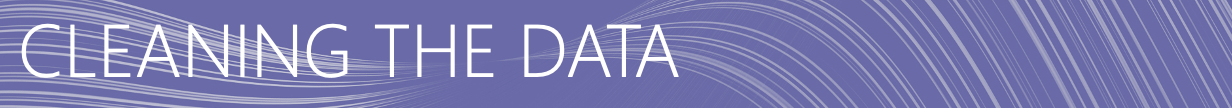

In [10]:
# Checking length 
print('length of data is', len(ta_df))

length of data is 5000


#### Distribution of Data - Target 

In [11]:
ta_df['sentiment'].unique()

array([0, 4], dtype=int64)

In [12]:
ta_df['sentiment'].value_counts(normalize=True)*100

4    50.08
0    49.92
Name: sentiment, dtype: float64

In [13]:

# Replacing the value 4 -->1 for ease of understanding.
# 0 = negative, 1 = positive
ta_df['sentiment'] = ta_df['sentiment'].replace(4,1)
ta_df.head()

,sentiment,date,user,tweet
541200,0,Tue Jun 16 18:18:12 PDT 2009,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,Mon Apr 06 23:11:14 PDT 2009,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,Tue Jun 23 13:40:11 PDT 2009,sammydearr,@TiannaChaos i know just family drama. its la...
285055,0,Mon Jun 01 10:26:07 PDT 2009,Lamb_Leanne,School email won't open and I have geography ...
705995,0,Sat Jun 20 12:56:51 PDT 2009,yogicerdito,upper airways problem


[Text(0.5, 1.0, 'Count of Tweets per Sentiment')]

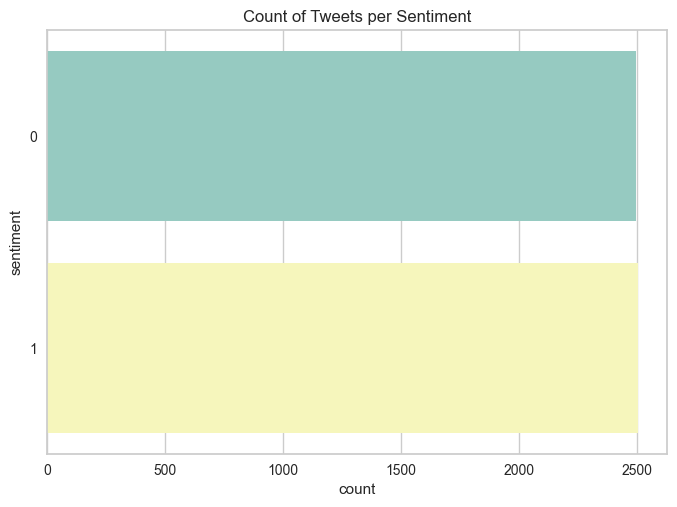

In [14]:
# Plot the count plot for the target labels.


p = sns.countplot(data = ta_df, y = 'sentiment', palette="Set3") #Setting p to plot of Emotion
p.set(xlabel = 'count') #Labling X
p.set(ylabel = 'sentiment') #Labling Y
p.set(title = "Count of Tweets per Sentiment")

In [15]:
print('Count of columns in the data is:  ', len(ta_df.columns))
print('Count of rows in the data is:  ', len(ta_df))

Count of columns in the data is:   4
Count of rows in the data is:   5000


#### Steps to clean the data

* Checking and handling NaN values
* Drop duplicate



In [16]:
ta_df.dropna(inplace=True)

In [17]:
len(ta_df.duplicated(keep='last'))

5000

In [18]:
ta_df.drop_duplicates()
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 541200 to 759598
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  5000 non-null   int64 
 1   date       5000 non-null   object
 2   user       5000 non-null   object
 3   tweet      5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 195.3+ KB


In [19]:
# import keras

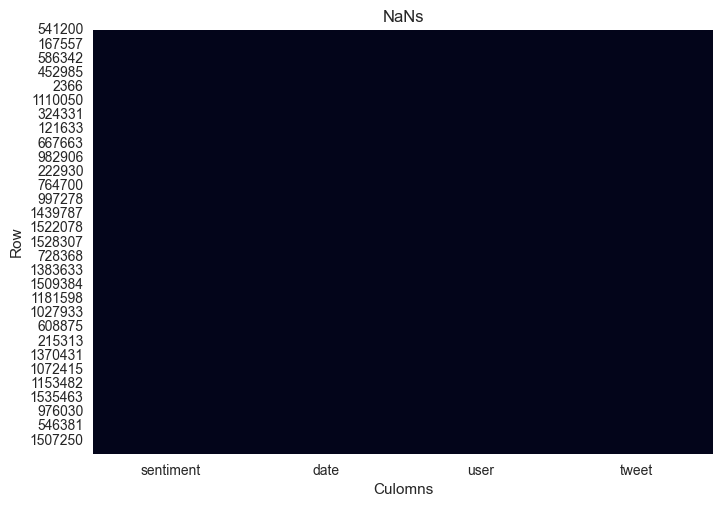

In [20]:
# Checking for Null values.  We use the heatmap code which shows the contrast well.

sns.heatmap(ta_df.isnull(), cbar=False)
plt.title("NaNs")
plt.xlabel('Culomns')
plt.ylabel('Row')
plt.show()

In [21]:
# Removing duplicate values
ta_df.drop_duplicates(inplace = True) 

In [22]:

# Creating an independent copy  

ta_df_copy = ta_df.copy()

### Pre-process Text

We will use text processing to allow the data to be more digestible for model use later in this project. This is an integral step in Natural Language Processing (NLP). 


The Preprocessing steps taken are:

* Converting to lower case letters: Each text will be transferred to a lower case letter.

* Removing Stopwords: Stopwords are common words used in the English language and do not add meaning to the sentences. Therefore we can remove them without sacrificing the meaning of the sentence. 

* Removing Words  with 2 letters: Words with length less than 2 are removed.

* Replacing http with space: Links starting with "http" or "https" or "www" are replaced by " 
".

* Lemmetizing 

In [23]:
# Testing PorterStemmer

In [24]:
tqdm.pandas()
ps = PorterStemmer()

TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# Replace 3 or more consecutive letters by 2 letter.
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"

stop_words = set(stopwords.words("english"))

def preprocess(text,apply_stem=True):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    text = re.sub(sequencePattern, seqReplacePattern, text)
    
    tokens = []
    for token in text.split():
        if token not in stop_words:
            
            if apply_stem:
                tokens.append(ps.stem(token))
            else:
                tokens.append(token)
            
    return " ".join(tokens)

In [25]:
ta_df['clean_tweet'] = ta_df['tweet'].progress_apply(lambda x:preprocess(x,True))

  0%|          | 0/5000 [00:00<?, ?it/s]

In [26]:
ta_df['clean_tweet_wt_stem'] = ta_df['tweet'].progress_apply(lambda x:preprocess(x,False))

  0%|          | 0/5000 [00:00<?, ?it/s]

In [27]:
# ta_df.drop('clean_tweets',axis=1,inplace=True)

In [28]:
ta_df.head()

,sentiment,date,user,tweet,clean_tweet,clean_tweet_wt_stem
541200,0,Tue Jun 16 18:18:12 PDT 2009,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahh hope ok,ahh hope ok
750,0,Mon Apr 06 23:11:14 PDT 2009,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",cool tweet app razr 2,cool tweet apps razr 2
766711,0,Tue Jun 23 13:40:11 PDT 2009,sammydearr,@TiannaChaos i know just family drama. its la...,know famili drama lame hey next time u hang ki...,know family drama lame hey next time u hang ki...
285055,0,Mon Jun 01 10:26:07 PDT 2009,Lamb_Leanne,School email won't open and I have geography ...,school email open geographi stuff revis stupid...,school email open geography stuff revise stupi...
705995,0,Sat Jun 20 12:56:51 PDT 2009,yogicerdito,upper airways problem,upper airway problem,upper airways problem


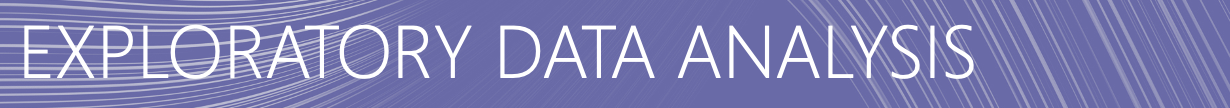

### Word Cloud

In [29]:
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return tuple(Reds_9.colors[random.randint(6,8)])  # Function to help us generate wordcloud

In [30]:
# text = ta_df['clean_tweet_wt_stem']

In [31]:
# mask = np.array(Image.open('/kaggle/input/pics-proj/tu.png'))

In [32]:
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return tuple(Reds_9.colors[random.randint(6,8)])  # Function to help us generate wordcloud

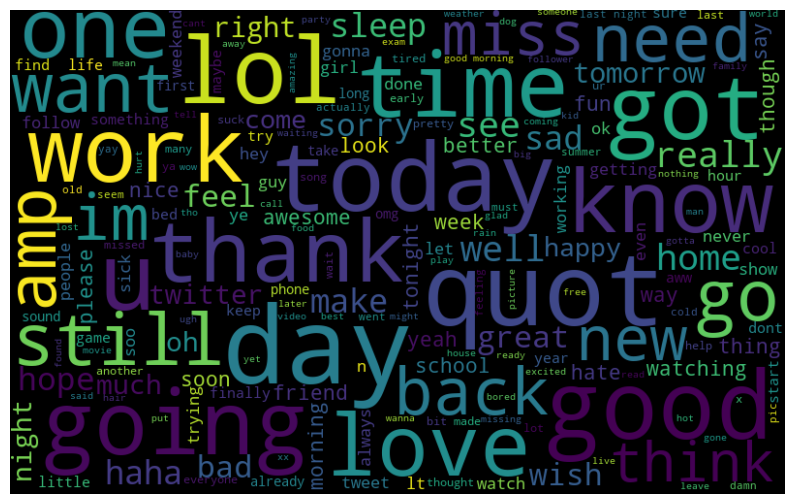

In [33]:
all_words = ' '.join([text for text in ta_df['clean_tweet_wt_stem']])

wordcloud = WordCloud(width=800, height=500, random_state=21, 
                      max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [34]:
tweets = ta_df['clean_tweet_wt_stem']

In [35]:
tweet_negative = ta_df[ta_df['sentiment']==0]
tweet_positive = ta_df[ta_df['sentiment']==1]

In [36]:
tweet_negative = tweet_negative['clean_tweet_wt_stem']
tweet_positive = tweet_positive['clean_tweet_wt_stem']

C:\Users\avitr\AppData\Local\Temp\ipykernel_25496\3476971079.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img.resize((20, 20), Image.ANTIALIAS)


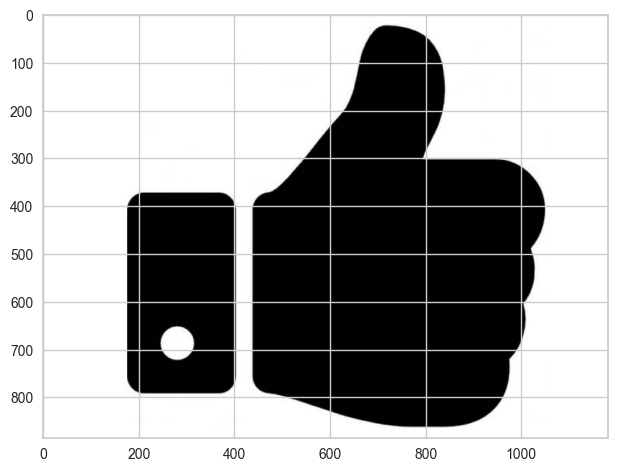

In [37]:
img = Image.open('upvote.png')
img.resize((20, 20), Image.ANTIALIAS)
plt.imshow(img)

C:\Users\avitr\AppData\Local\Temp\ipykernel_25496\1408402013.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  mask_d.resize((20, 20), Image.ANTIALIAS)


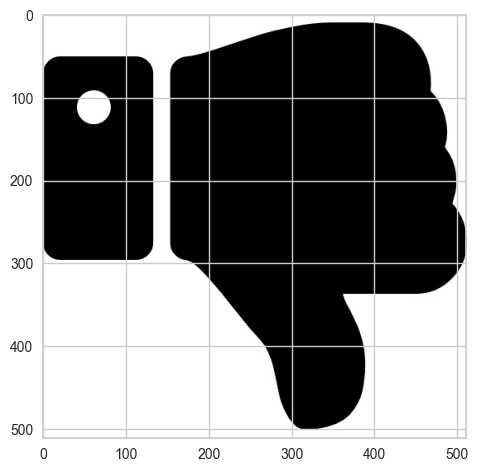

In [38]:
mask_d = Image.open('final.png')
mask_d.resize((20, 20), Image.ANTIALIAS)
plt.imshow(mask_d)

In [39]:
tweets = ta_df['clean_tweet_wt_stem'] 
# Create a new dataframe for the tweets that have stemming 


In [40]:
# def create_wordcloud(text):
#  mask = np.array(Image.open('tu.png'))
#  #stopwords = set(STOPWORDS)
#  wc_pos_text = ' '.join([text for text in tweet_positive])

#  wc_pos = WordCloud(background_color='white',
#  mask = mask, width=800, height=500, random_state=21, 
#                       max_font_size=110).generate(wc_pos_text)

    
#  wc_pos.to_file('wc.png')

#  print('Word Cloud Saved Successfully')
#  path = 'wc.png'
#  display(Image.open(path))

In [41]:
def wc(data,bgcolor,title, mask,fname):
    
    plt.figure(figsize = (50,50))
    
    wc = WordCloud(width = 300, height = 200,background_color='white',
                   max_words = 50,  max_font_size = 100,
                   colormap='rainbow',mask=mask)
    
    wc.generate(' '.join(data))
    
    plt.imshow(wc)
    plt.grid(visible=False)
    plt.savefig(f'{fname}.png',dpi=200)
#     plt.axis('off')

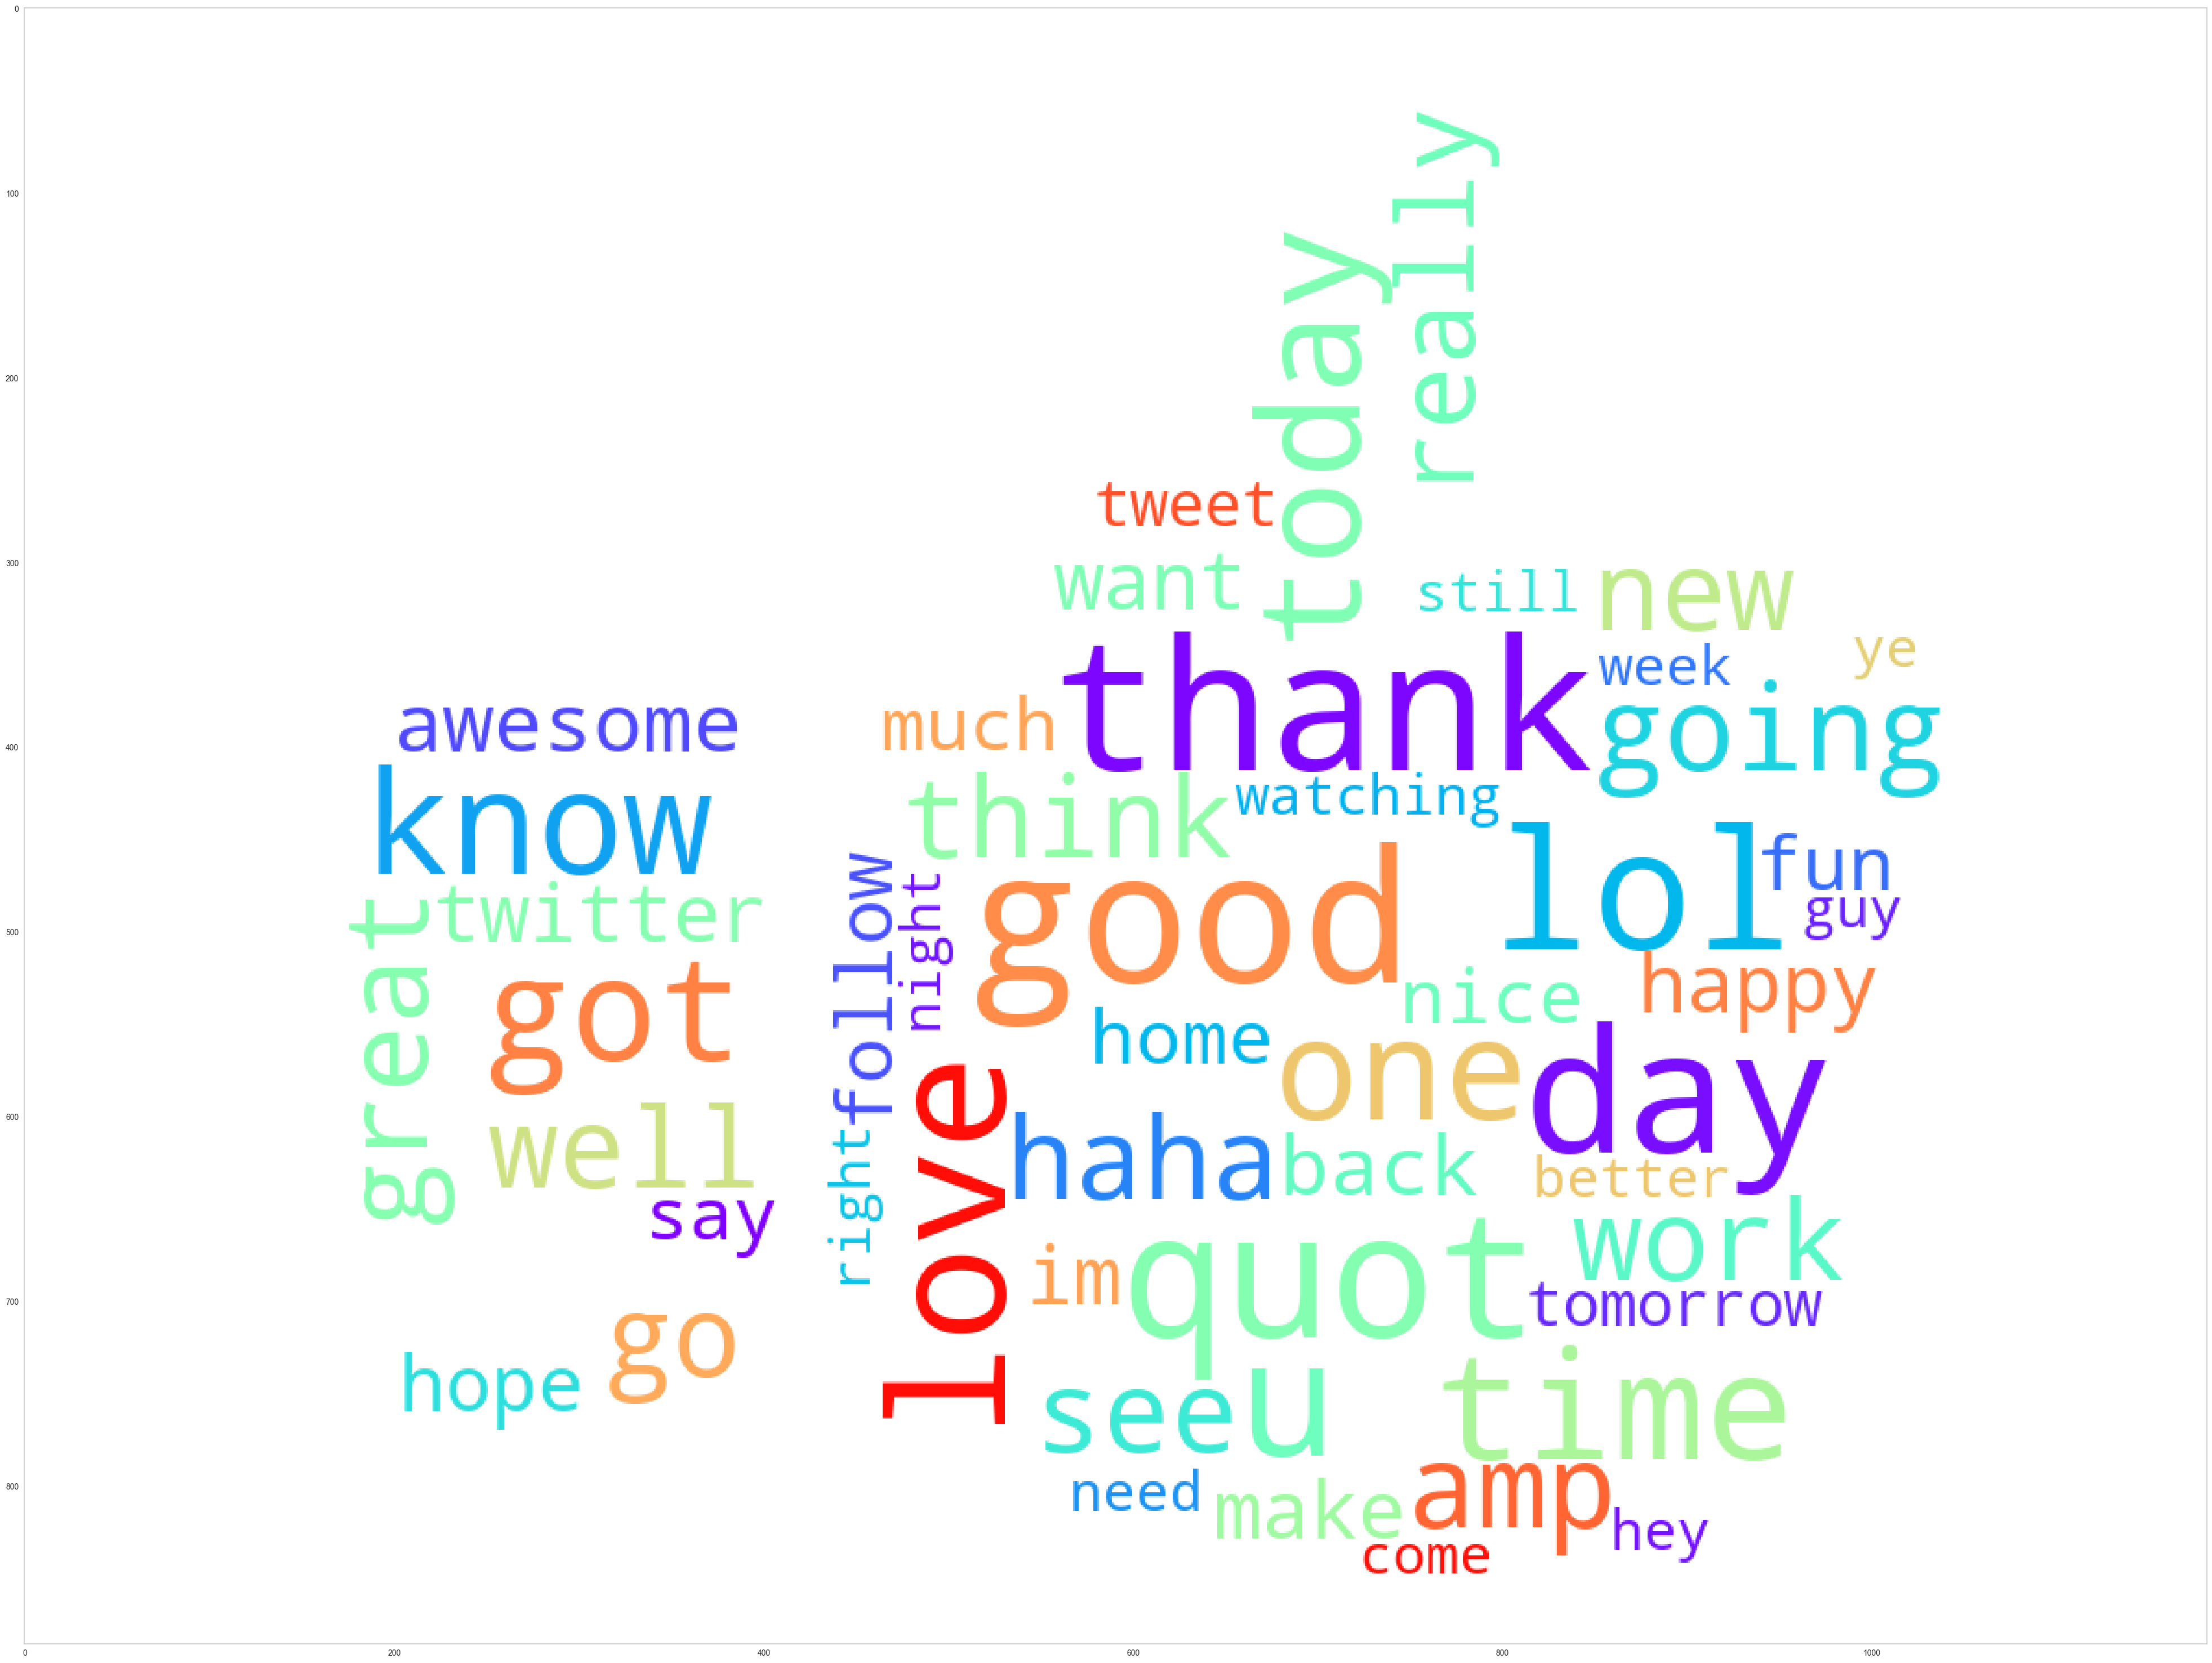

In [42]:
mask_pos = np.array(Image.open('upvote.png'))
wc(tweet_positive,'black','Common Words', mask_pos,'positive')

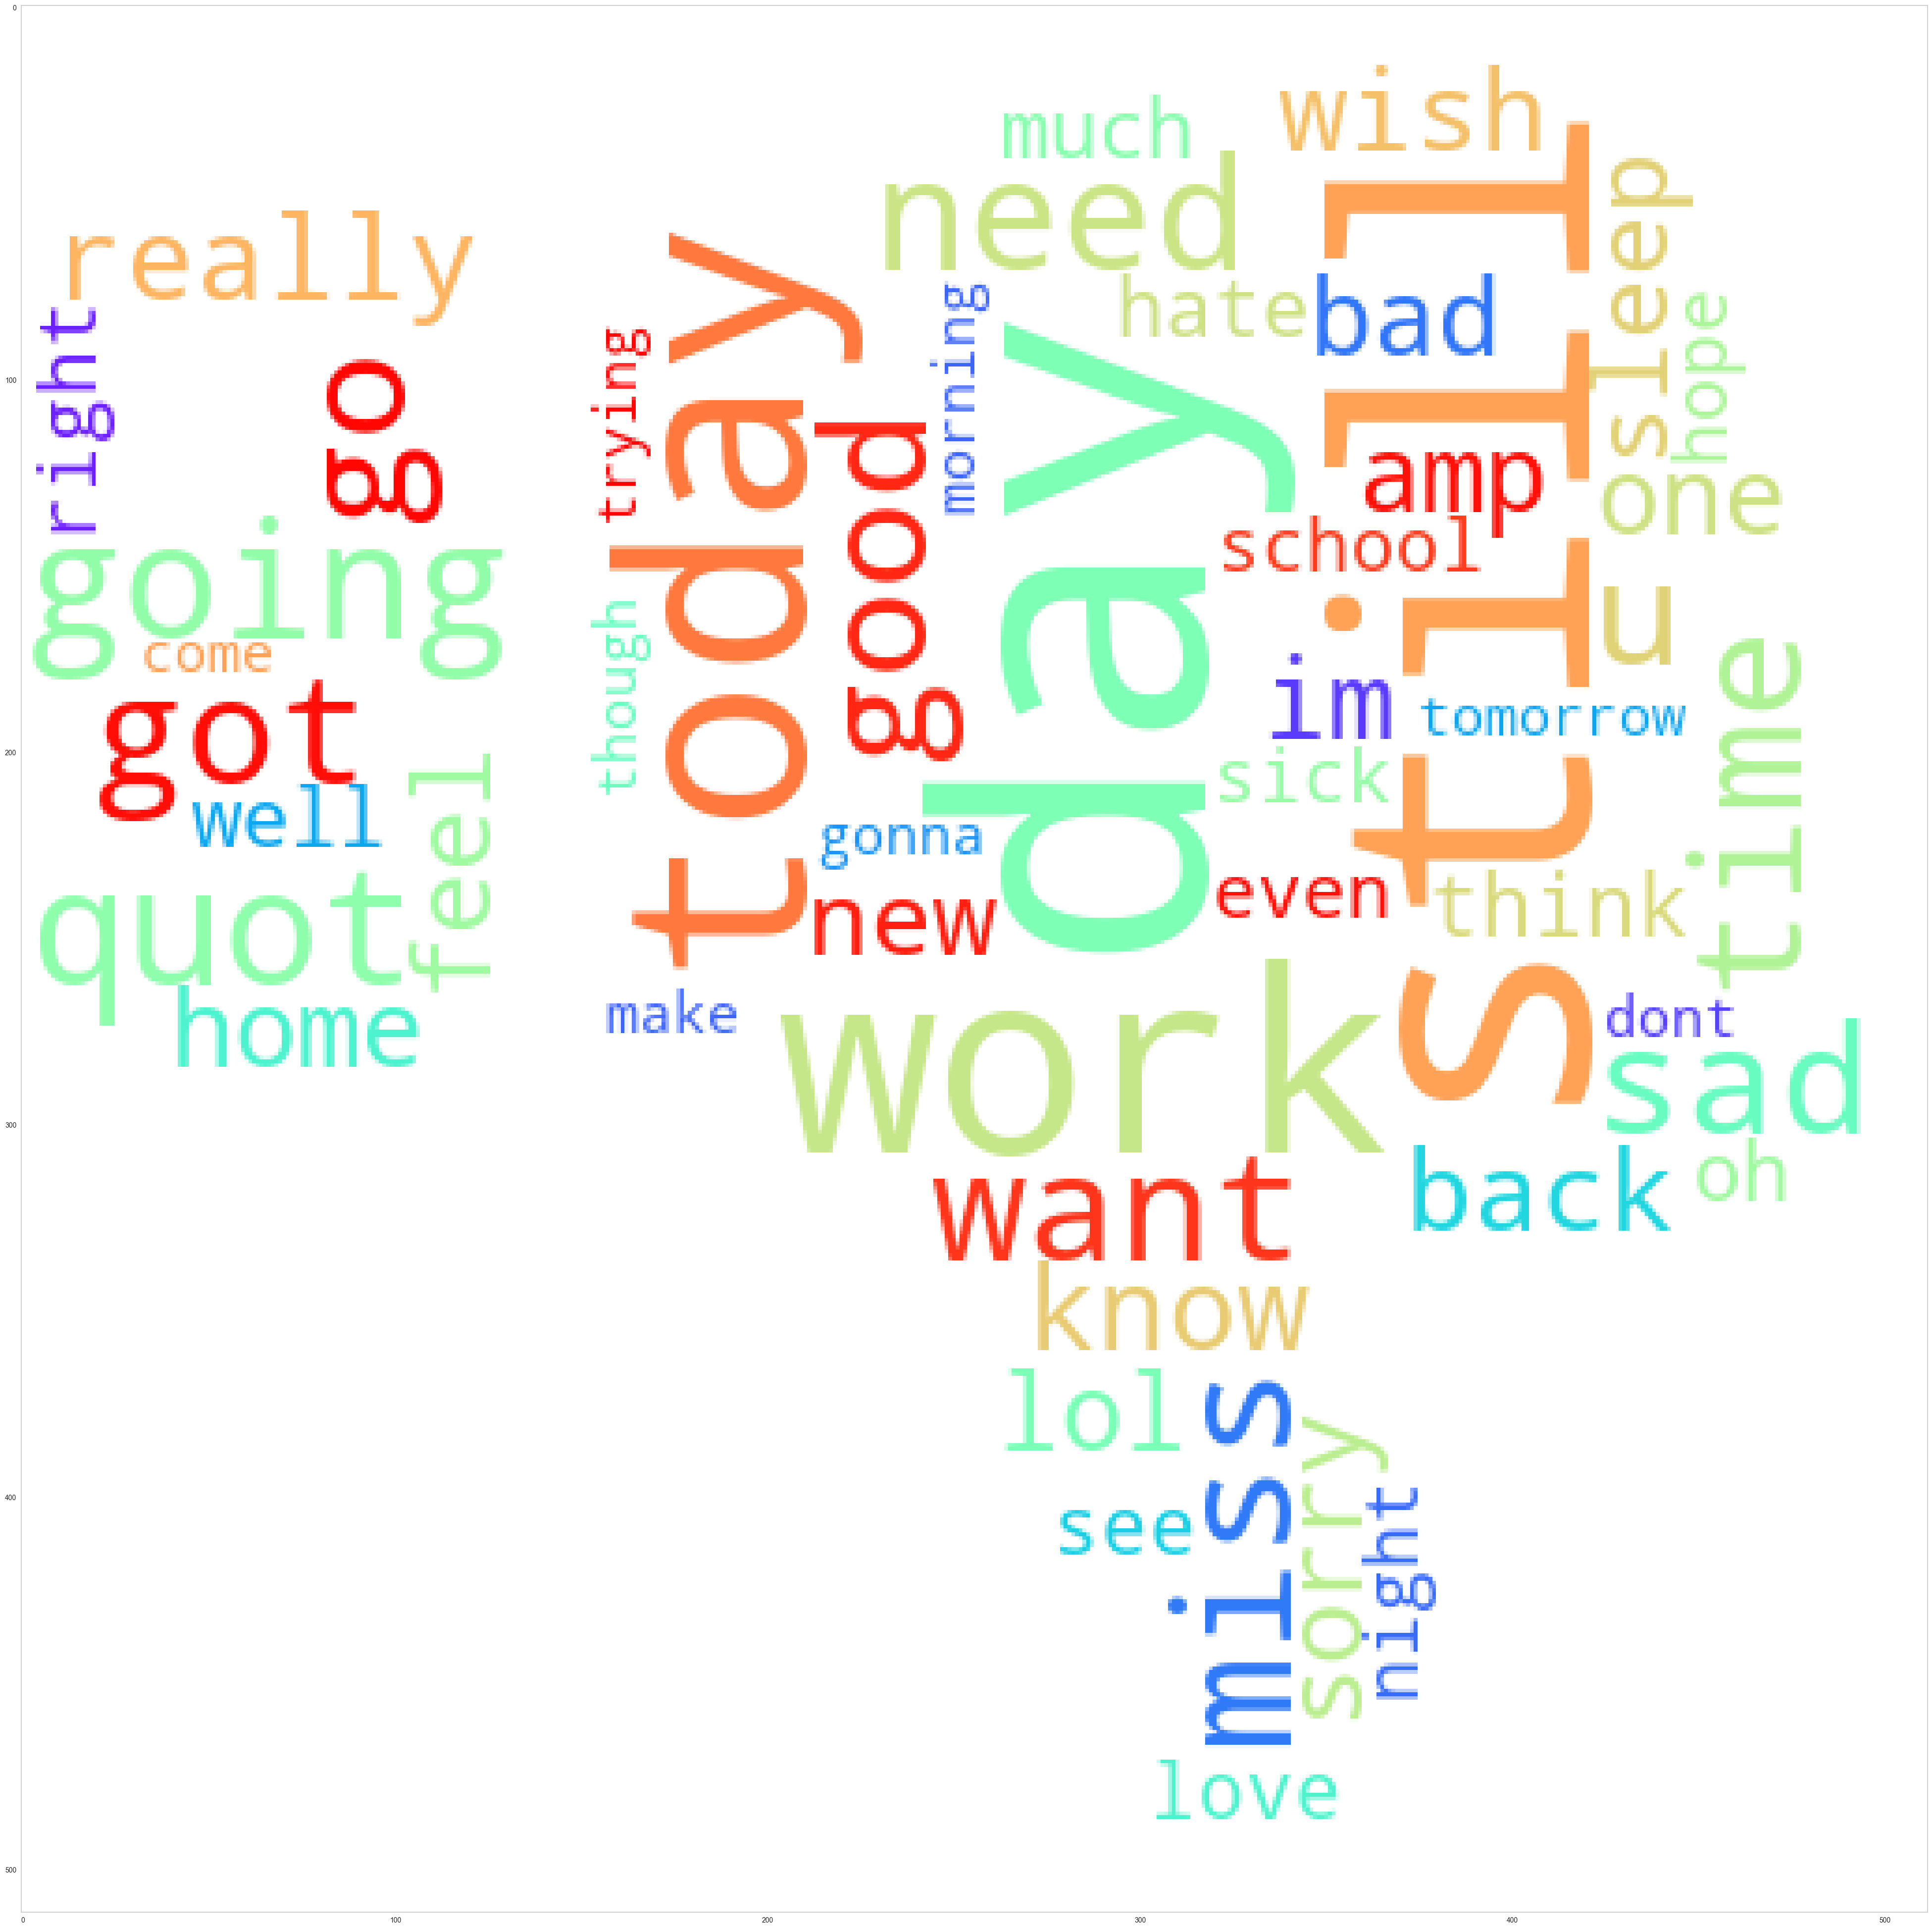

In [43]:
mask_neg = np.array(Image.open('final.png'))
wc(tweet_negative,'black','Common Words', mask_neg,'negative')

In [44]:

#     pos_df = ta_df['clean_tweet'].loc[ta_df['sentiment'] == 1] 
#     #New dataframe of only positive rated tweet tokens

#     neg_df = ta_df['clean_tweet'].loc[ta_df['sentiment'] == 0] 
#     #New dataframe of only negative rated tweet tokens

In [45]:
pos_df = ta_df['clean_tweet'].loc[ta_df['sentiment'] == 1].progress_apply(lambda line:line.split())


  0%|          | 0/2504 [00:00<?, ?it/s]

In [46]:
neg_df = ta_df['clean_tweet'].loc[ta_df['sentiment'] == 0].progress_apply(lambda line:line.split())


  0%|          | 0/2496 [00:00<?, ?it/s]

In [47]:

tokens = [] #Instantiating total token list
tokens_pos = [] #Instantiating positive token list
tokens_neg = [] #Instantiating negative token list


for row in pos_df:
    tokens.extend(row) #Populating token list from dataframe
for row in pos_df:
    tokens_pos.extend(row) #Populating token list from dataframe
for row in neg_df:
    tokens_neg.extend(row) #Populating token list from dataframe

print(f'Total Corpus Tokens: {len(tokens)}') 
# Print total number of tokens
print(f'Number of Positive Tokens: {len(tokens_pos)}') 
# Print number of positive tokens
print(f'Number of Negative Tokens: {len(tokens_neg)}') 
# Print number of negative tokens


Total Corpus Tokens: 17879
Number of Positive Tokens: 17879
Number of Negative Tokens: 18547


In [48]:
tokens

['lunch',
 'dj',
 'come',
 'eat',
 'thank',
 'glad',
 'like',
 'product',
 'review',
 'bit',
 'site',
 'enjoy',
 'knit',
 'zach',
 'make',
 'pee',
 'sit',
 'grown',
 'gay',
 'man',
 'sum',
 'day',
 'one',
 'word',
 'kacker',
 'great',
 'mind',
 'think',
 'alik',
 'oh',
 'realli',
 'great',
 'small',
 'blizzard',
 'also',
 'cold',
 'wind',
 'blow',
 'lol',
 'calm',
 'got',
 '30day',
 'loan',
 'offer',
 '1500',
 'feel',
 'quit',
 'sleepi',
 'today',
 'wish',
 'could',
 'stay',
 'bed',
 'today',
 'ok',
 'last',
 'year',
 'let',
 'go',
 'school',
 'whaddup',
 'whaddup',
 'whaddup',
 'whaddup',
 'whaddup',
 'got',
 'white',
 'girl',
 'swag',
 'head',
 'shoe',
 'whaddup',
 'yungla',
 'will',
 'pay',
 '40',
 '50',
 'thu',
 'cover',
 'cost',
 'set',
 'one',
 'got',
 'counter',
 'offer',
 'listen',
 'work',
 'photo',
 'hillsong',
 '1',
 'year',
 'celebr',
 'stay',
 'tune',
 'ww',
 'hillsong',
 'co',
 'za',
 'ha',
 'ha',
 'want',
 'see',
 'pictur',
 'minist',
 'boobi',
 'flahs',
 'im',
 'turn',


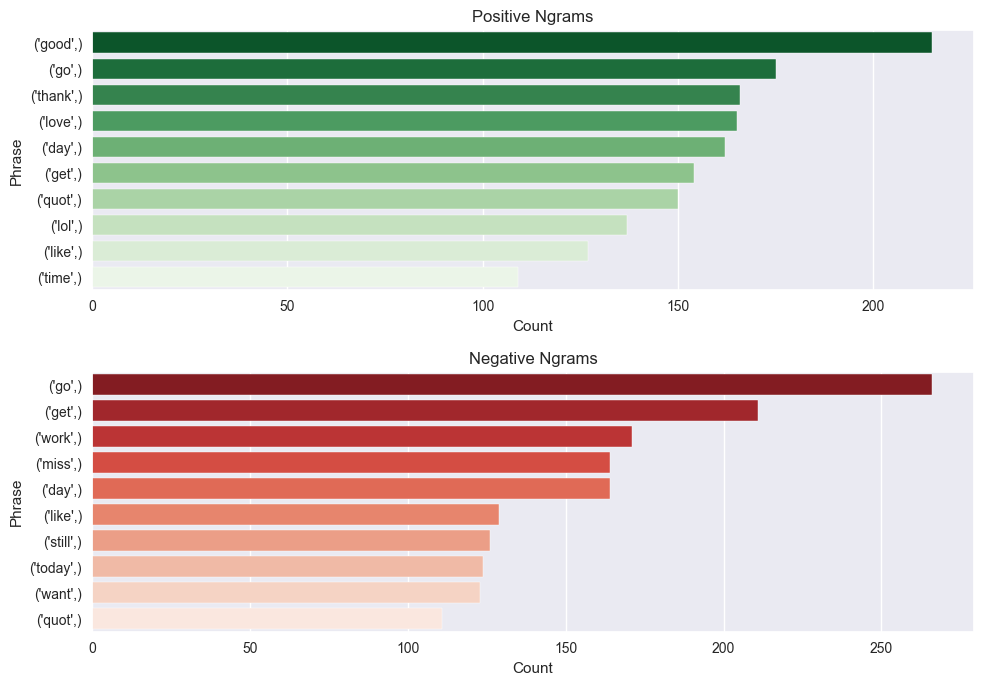

In [49]:
def make_ngram(i, tokens_pos = tokens_pos, tokens_neg = tokens_neg): #Defining function
    
    n_gram_pos = (pd.Series(nltk.ngrams(tokens_pos, i)).value_counts())[:10] #Setting up positive ngram
    n_gram_neg = (pd.Series(nltk.ngrams(tokens_neg, i)).value_counts())[:10] #Setting up negative ngram
    
    n_gram_df_pos = pd.DataFrame(n_gram_pos) #Creating positive ngram dataframe
    n_gram_df_neg = pd.DataFrame(n_gram_neg) #Creating negative ngram dataframe
    
    n_gram_df_pos = n_gram_df_pos.reset_index() #Resetting index
    n_gram_df_neg = n_gram_df_neg.reset_index() #Resetting index
    
    n_gram_df_pos = n_gram_df_pos.rename(columns = {'index': 'Phrase', 0: 'Count'}) #Renaming positive plot
    n_gram_df_neg = n_gram_df_neg.rename(columns = {'index': 'Phrase', 0: 'Count'}) #Renaming negative plot
    
    with sns.axes_style('darkgrid'): #Setting seaborn to darkgrid style
        
        fig = plt.figure(figsize = (10, 10)) #Setting figsize
        ax1 = fig.add_subplot(311) #Stacking first figure
        ax2 = fig.add_subplot(312) #Stacking second figure
        
        sns.barplot(ax = ax1, x = 'Count', y = 'Phrase', data = n_gram_df_pos, 
                    palette = 'Greens_r').set(title = 'Positive Ngrams') #Assigning barplot to positive ngrams
        sns.barplot(ax = ax2, x = 'Count', y = 'Phrase', data = n_gram_df_neg, 
                   palette = 'Reds_r').set(title = 'Negative Ngrams') #Assigning barplot to negative ngrams
        
        
    plt.tight_layout() #Make plot layouts tight

make_ngram(1) #Plot 1 word ngrams

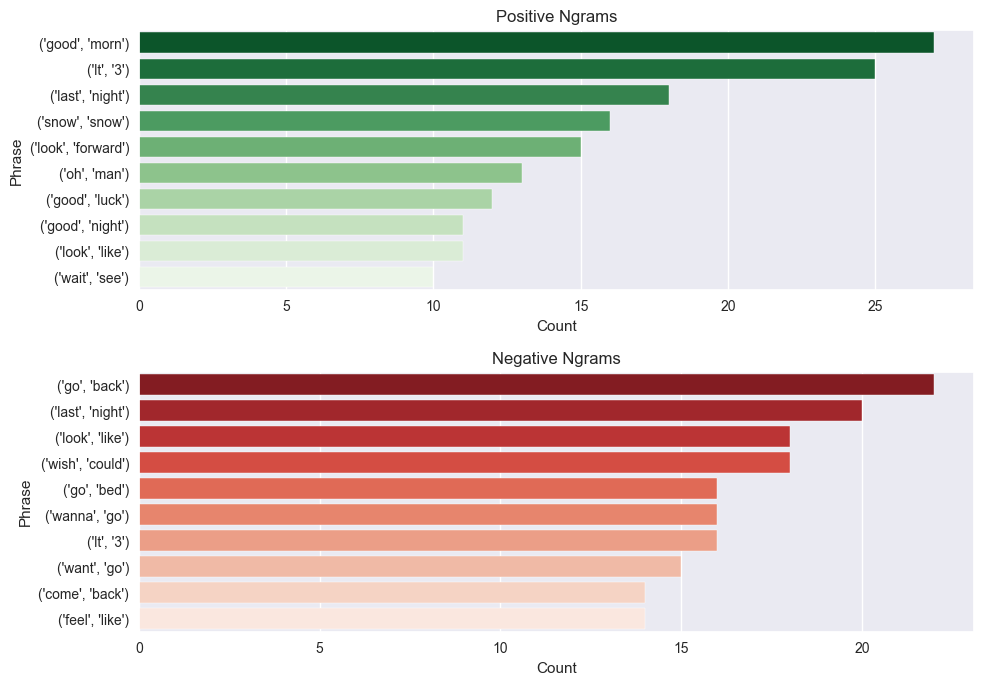

In [50]:
make_ngram(2) #Plot 2 word ngrams

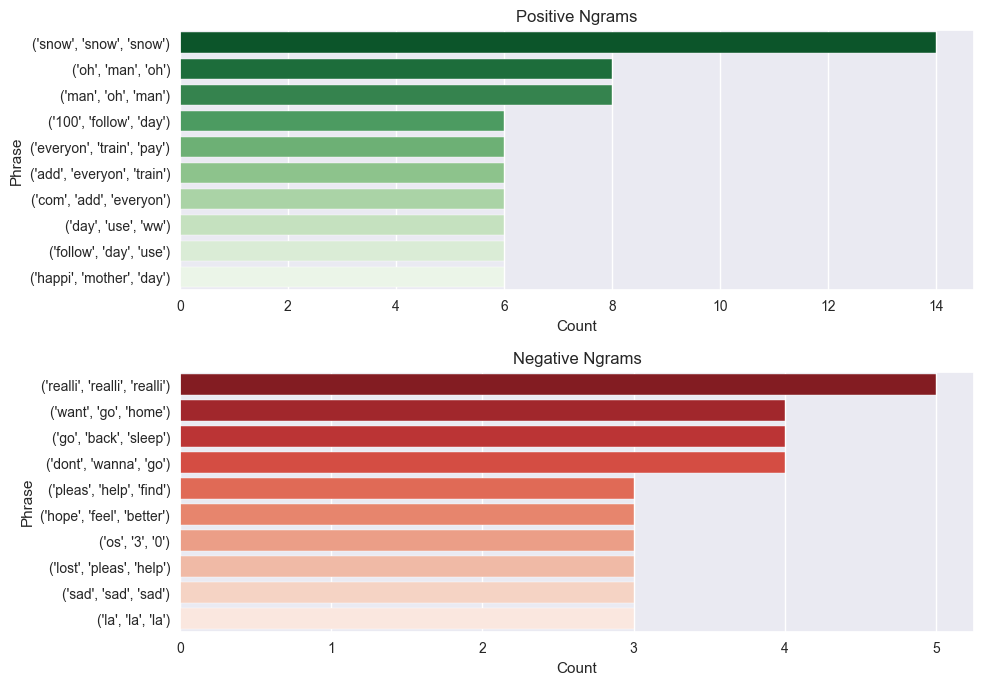

In [51]:
make_ngram(3) #Plot 3 word ngrams

In [52]:
# Need to fix the above

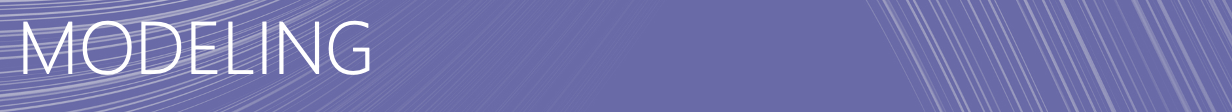

### Split Data 

In [53]:
X = ta_df['clean_tweet']#[:50000]

y = ta_df['sentiment']#[:50000]

In [54]:
list(set(ta_df['sentiment']))

[0, 1]

In [55]:
y.head()

541200    0
750       0
766711    0
285055    0
705995    0
Name: sentiment, dtype: int64

In [56]:
ta_df['sentiment'].value_counts()

1    2504
0    2496
Name: sentiment, dtype: int64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 43)

In [58]:
# Checking shape of train and test data

print(X_train.shape, y_train.shape) 

print(X_test.shape , y_test.shape) 


(3750,) (3750,)
(1250,) (1250,)


In [58]:
### Visulization

### TF-IDF

In [59]:
vectoriser_tfidf = TfidfVectorizer()

In [60]:
vectoriser_tfidf.fit(X_train)

print('Number of feature words:', len(vectoriser_tfidf.get_feature_names()))

Number of feature words: 6276


C:\Users\avitr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [61]:
X_train_tfidf = vectoriser_tfidf.transform(X_train)
X_test_tfidf  = vectoriser_tfidf.transform(X_test)

In [62]:
# print(X_train_tfidf.toarray())

In [63]:
1199859*221591/1024/1024

253560.97762012482

### CountVectorizer

In [64]:
vectorizer_vc = CountVectorizer()
vectorizer_vc.fit(X_train)

CountVectorizer()

In [65]:
X_train_vc = vectorizer_vc.transform(X_train)
X_test_vc  = vectorizer_vc.transform(X_test)

In [66]:
# Building a function that will fit the model and then fit it to produce predicted values. 

def Train_Test_Scores(model,X_train,y_train,X_test,y_test,display=False):
    
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    
    # Store the score for later evaluation of the model. 
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    precision = precision_score(y_test,y_preds)
    recall = recall_score(y_test,y_preds)
    f1 = f1_score(y_test,y_preds)
    
    # Allowing the display to switch off for later on when I just need to function to run 
    # for other purposes like creating a data frame of the scoring. 
    
    if display:
        print('Training_Accuracy:',  train_acc)
        print('Test_Accuracy:', test_acc)

        print('Precision:', precision)
        print('Recall:', recall) 
        print('F1_Score:', f1)
          
        plot_confusion_matrix(model, X_test, y_test, cmap="Blues")
          
          
    return train_acc,test_acc,precision,recall,f1

In [67]:
from tqdm.notebook import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,precision_score,recall_score, plot_confusion_matrix

In [80]:
 # Function that prints confusion matrix and class report.

# def confmat_and_classrep(estimator, X_train, y_train,X_test,y_test name): 
    
#     estimator.fit(X_train, y_train)
#     predictions = estimator.predict(X_test) #  Estimators prediction

#     # Print name of the classification report 
#     print(f'Classification Report for {name} Set') 
    
    
#     # Print classification report numbers
    
#     print(classification_report(y_test, predictions,)) 
    
    
#     # Making subplots for each matrix
    
#     fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5)) 
    
#     matrix = plot_confusion_matrix(estimator, X, y,  
#                                    cmap = plt.cm.viridis, 
#                                    xticks_rotation = 70, 
#                                    values_format = 'd', 
#                                    ax = axes[0]) # Plot non-normal matrix
    
#     matrix.ax_.set_title(f'{name} Set Confusion Matrix, \n without Normalization') 
#     # setting title of non-normal
    
#     matrix = plot_confusion_matrix(estimator, X, y, cmap = plt.cm.viridis, 
#                                   xticks_rotation = 70, normalize = 'true', ax = axes[1]) 
#     # plot normal matrix
    
#     matrix.ax_.set_title(f'{name} Set Confusion Matrix, \n with Normalization') 
#     # setting title of normal matrix
    
    
#     plt.subplots_adjust(wspace = 0.5) #Adding space between graphs
    
#     plt.show() #Showing matrix

In [81]:
# y_pred = clf.predict(X_test_vc)

In [82]:
# rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [83]:
# gnb = GaussianNB()

In [84]:
# xgboost = XGBClassifier(n_jobs=-1)

In [85]:

# confmat_and_classrep(rf, X_train_vc, y_train, 'Training Data')


In [86]:
# confmat_and_classrep(xgboost, X_train_vc, y_train, 'Training Data')


## Word Embedding using Word2Vec

In [68]:
corpus = X.progress_apply(lambda line:line.split())

  0%|          | 0/5000 [00:00<?, ?it/s]

In [69]:
corpus

541200                                       [ahh, hope, ok]
750                              [cool, tweet, app, razr, 2]
766711     [know, famili, drama, lame, hey, next, time, u...
285055     [school, email, open, geographi, stuff, revis,...
705995                              [upper, airway, problem]
                                 ...                        
1158200    [way, freedom, feel, like, trap, jail, 2, amp,...
966771     [minor, report, seen, one, long, enough, hope,...
47209             [oh, tire, pillow, blanket, work, 8, yuck]
1123661    [yet, set, think, ownership, mayb, content, sm...
759598             [stilv, right, awesom, tast, coffe, none]
Name: clean_tweet, Length: 5000, dtype: object

In [70]:
# Train Word2Vec Model on corpus
model = Word2Vec(corpus, 
                 min_count=10,          # word frequency
                 vector_size=300,      # dimention of word embeddings
                 workers=os.cpu_count(),            # Number of processors
                ) 

In [71]:
# pd.DataFrame((model.wv['ahh'] + model.wv['hope']  + model.wv['ok'])/3).T   #ahh, hope, ok]

In [72]:
ta_df['tokens'] = ta_df['clean_tweet'].progress_apply(lambda line:line.split())

  0%|          | 0/5000 [00:00<?, ?it/s]

In [73]:
ta_df.head()

,sentiment,date,user,tweet,clean_tweet,clean_tweet_wt_stem,tokens
541200,0,Tue Jun 16 18:18:12 PDT 2009,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahh hope ok,ahh hope ok,"[ahh, hope, ok]"
750,0,Mon Apr 06 23:11:14 PDT 2009,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",cool tweet app razr 2,cool tweet apps razr 2,"[cool, tweet, app, razr, 2]"
766711,0,Tue Jun 23 13:40:11 PDT 2009,sammydearr,@TiannaChaos i know just family drama. its la...,know famili drama lame hey next time u hang ki...,know family drama lame hey next time u hang ki...,"[know, famili, drama, lame, hey, next, time, u..."
285055,0,Mon Jun 01 10:26:07 PDT 2009,Lamb_Leanne,School email won't open and I have geography ...,school email open geographi stuff revis stupid...,school email open geography stuff revise stupi...,"[school, email, open, geographi, stuff, revis,..."
705995,0,Sat Jun 20 12:56:51 PDT 2009,yogicerdito,upper airways problem,upper airway problem,upper airways problem,"[upper, airway, problem]"


In [74]:
ta_df = ta_df[ta_df['tokens'].apply(lambda line: True if len(line) else False)]

In [75]:
# ta_df   [   ta_df['tokens'].apply(lambda t: False if len(t) else True)      ]

In [76]:
ta_df['tokens']

541200                                       [ahh, hope, ok]
750                              [cool, tweet, app, razr, 2]
766711     [know, famili, drama, lame, hey, next, time, u...
285055     [school, email, open, geographi, stuff, revis,...
705995                              [upper, airway, problem]
                                 ...                        
1158200    [way, freedom, feel, like, trap, jail, 2, amp,...
966771     [minor, report, seen, one, long, enough, hope,...
47209             [oh, tire, pillow, blanket, work, 8, yuck]
1123661    [yet, set, think, ownership, mayb, content, sm...
759598             [stilv, right, awesom, tast, coffe, none]
Name: tokens, Length: 4978, dtype: object

In [77]:

ta_df

,sentiment,date,user,tweet,clean_tweet,clean_tweet_wt_stem,tokens
541200,0,Tue Jun 16 18:18:12 PDT 2009,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahh hope ok,ahh hope ok,"[ahh, hope, ok]"
750,0,Mon Apr 06 23:11:14 PDT 2009,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",cool tweet app razr 2,cool tweet apps razr 2,"[cool, tweet, app, razr, 2]"
766711,0,Tue Jun 23 13:40:11 PDT 2009,sammydearr,@TiannaChaos i know just family drama. its la...,know famili drama lame hey next time u hang ki...,know family drama lame hey next time u hang ki...,"[know, famili, drama, lame, hey, next, time, u..."
285055,0,Mon Jun 01 10:26:07 PDT 2009,Lamb_Leanne,School email won't open and I have geography ...,school email open geographi stuff revis stupid...,school email open geography stuff revise stupi...,"[school, email, open, geographi, stuff, revis,..."
705995,0,Sat Jun 20 12:56:51 PDT 2009,yogicerdito,upper airways problem,upper airway problem,upper airways problem,"[upper, airway, problem]"
...,...,...,...,...,...,...,...
1158200,1,Sun May 31 02:13:48 PDT 2009,mimikinns,on my way to freedom - feels like i've been tr...,way freedom feel like trap jail 2 amp half fri...,way freedom feels like trapped jail 2 amp half...,"[way, freedom, feel, like, trap, jail, 2, amp,..."
966771,1,Sun May 17 11:18:39 PDT 2009,Joyhmb3,Minority report I have seen this one but it's ...,minor report seen one long enough hope get dis...,minority report seen one long enough hopefully...,"[minor, report, seen, one, long, enough, hope,..."
47209,0,Sat May 02 02:52:50 PDT 2009,Trishanson,Oh so tired.. I can't for my pillow and blanke...,oh tire pillow blanket work 8 yuck,oh tired pillow blanket work 8 yuck,"[oh, tire, pillow, blanket, work, 8, yuck]"
1123661,1,Sat May 30 13:19:23 PDT 2009,DiaZerva,"@satinephoenix not yet, on set but I think it ...",yet set think ownership mayb content smurf,yet set think ownership maybe content smurf,"[yet, set, think, ownership, mayb, content, sm..."


In [78]:
X_w2v = ta_df['tokens']#[:50000]
y_w2v = ta_df['sentiment']#[:50000]

In [79]:
len(X_w2v)

4978

In [80]:
# model.wv.get_vector('there')

In [81]:
all_word2vec_vocab = set(model.wv.key_to_index)

In [82]:
def get_embed(token_list):
    n = len(token_list)
    embed = np.zeros((200))
    for token in token_list:
        if token in all_word2vec_vocab:
            embed = embed + model.wv.get_vector(token)
        else:
            temp = sorted([(textdistance.levenshtein.normalized_distance(e,token), e) for e in all_word2vec_vocab],reverse=False)[0][1]
            embed = embed + model.wv.get_vector(temp)
    return embed/n

In [84]:
# X_w2v_embed = X_w2v.progress_apply(get_embed)

In [ ]:
X_w2v_embed

In [85]:
# get_embed(['hi','there'])

In [86]:
df_new = pd.DataFrame(X_w2v_embed)

In [87]:
df_new.reset_index(drop=True,inplace=True)

In [88]:
df_new

,tokens
0,"[-0.0037124210696977875, -0.0690062828361988, ..."
1,"[-0.0016230591339990498, -0.05829590428620577,..."
2,"[-0.0045982197985530975, -0.06172901496756822,..."
3,"[-0.0024299650867760647, -0.0560478325933218, ..."
4,"[0.001002834178507328, -0.018920102544749778, ..."
...,...
4973,"[-0.0017816852923715487, -0.0551580237399321, ..."
4974,"[-0.0019075587682891638, -0.05046687906142324,..."
4975,"[-0.0025681431704599944, -0.043085984020893066..."
4976,"[-0.0011665623377276851, -0.04346737889240363,..."


In [89]:
df_new[list(range(200))] = pd.DataFrame(df_new.tokens.tolist(), index= df_new.index)

C:\Users\avitr\AppData\Local\Temp\ipykernel_33784\3530036794.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[list(range(200))] = pd.DataFrame(df_new.tokens.tolist(), index= df_new.index)
C:\Users\avitr\AppData\Local\Temp\ipykernel_33784\3530036794.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[list(range(200))] = pd.DataFrame(df_new.tokens.tolist(), index= df_new.index)
C:\Users\avitr\AppData\Local\Temp\ipykernel_33784\3530036794.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually th

In [90]:
df_new.drop('tokens',axis=1,inplace=True)

In [91]:
df_new

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.003712,-0.069006,-0.007787,0.148274,0.099488,-0.097442,0.005612,0.340735,-0.078966,0.188422,...,0.181953,-0.088071,-0.019768,-0.131738,0.126070,0.075760,0.040558,-0.130768,-0.042021,-0.117231
1,-0.001623,-0.058296,-0.003068,0.122287,0.086405,-0.075216,0.005855,0.277825,-0.067492,0.156211,...,0.146358,-0.069513,-0.010995,-0.110101,0.101973,0.059584,0.034159,-0.105646,-0.032984,-0.098295
2,-0.004598,-0.061729,-0.006502,0.125067,0.088400,-0.080660,0.004184,0.288675,-0.065827,0.161794,...,0.156932,-0.070860,-0.011965,-0.111177,0.104042,0.061466,0.035746,-0.111172,-0.037475,-0.102492
3,-0.002430,-0.056048,-0.003795,0.116478,0.080146,-0.075400,0.004695,0.269544,-0.063163,0.149536,...,0.146720,-0.068065,-0.008256,-0.106847,0.101479,0.060958,0.035048,-0.103300,-0.034960,-0.092802
4,0.001003,-0.018920,-0.001880,0.043779,0.026587,-0.025490,0.005420,0.096291,-0.023379,0.053725,...,0.050709,-0.025792,-0.006571,-0.039627,0.037186,0.024086,0.012143,-0.037647,-0.014932,-0.031712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,-0.001782,-0.055158,-0.004166,0.116717,0.078580,-0.076401,0.005736,0.273589,-0.065330,0.150072,...,0.145451,-0.068197,-0.012411,-0.104527,0.102772,0.056668,0.032115,-0.105387,-0.036641,-0.096174
4974,-0.001908,-0.050467,-0.005700,0.102110,0.073777,-0.065256,0.004703,0.239118,-0.055161,0.135076,...,0.125161,-0.059773,-0.010930,-0.092584,0.086488,0.051040,0.029834,-0.090964,-0.030383,-0.083038
4975,-0.002568,-0.043086,-0.003111,0.098626,0.072229,-0.067918,0.002461,0.232881,-0.052191,0.127935,...,0.127062,-0.057914,-0.006229,-0.088361,0.087018,0.051596,0.027261,-0.086057,-0.027437,-0.081073
4976,-0.001167,-0.043467,-0.004397,0.090118,0.061961,-0.058207,0.005142,0.210807,-0.047289,0.116069,...,0.111499,-0.052816,-0.011962,-0.080890,0.079223,0.046664,0.024207,-0.080704,-0.026906,-0.070831


In [92]:
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(df_new, y_w2v, test_size = 0.25, random_state = 43)

In [93]:
clf_xg = XGBClassifier(n_jobs=-1)

In [94]:
clf_xg.fit(X_train_w2v,y_train_w2v)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [95]:
y_pred_w2v = clf_xg.predict(X_test_w2v)

In [96]:
df_new # correlation coeff 

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.003712,-0.069006,-0.007787,0.148274,0.099488,-0.097442,0.005612,0.340735,-0.078966,0.188422,...,0.181953,-0.088071,-0.019768,-0.131738,0.126070,0.075760,0.040558,-0.130768,-0.042021,-0.117231
1,-0.001623,-0.058296,-0.003068,0.122287,0.086405,-0.075216,0.005855,0.277825,-0.067492,0.156211,...,0.146358,-0.069513,-0.010995,-0.110101,0.101973,0.059584,0.034159,-0.105646,-0.032984,-0.098295
2,-0.004598,-0.061729,-0.006502,0.125067,0.088400,-0.080660,0.004184,0.288675,-0.065827,0.161794,...,0.156932,-0.070860,-0.011965,-0.111177,0.104042,0.061466,0.035746,-0.111172,-0.037475,-0.102492
3,-0.002430,-0.056048,-0.003795,0.116478,0.080146,-0.075400,0.004695,0.269544,-0.063163,0.149536,...,0.146720,-0.068065,-0.008256,-0.106847,0.101479,0.060958,0.035048,-0.103300,-0.034960,-0.092802
4,0.001003,-0.018920,-0.001880,0.043779,0.026587,-0.025490,0.005420,0.096291,-0.023379,0.053725,...,0.050709,-0.025792,-0.006571,-0.039627,0.037186,0.024086,0.012143,-0.037647,-0.014932,-0.031712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,-0.001782,-0.055158,-0.004166,0.116717,0.078580,-0.076401,0.005736,0.273589,-0.065330,0.150072,...,0.145451,-0.068197,-0.012411,-0.104527,0.102772,0.056668,0.032115,-0.105387,-0.036641,-0.096174
4974,-0.001908,-0.050467,-0.005700,0.102110,0.073777,-0.065256,0.004703,0.239118,-0.055161,0.135076,...,0.125161,-0.059773,-0.010930,-0.092584,0.086488,0.051040,0.029834,-0.090964,-0.030383,-0.083038
4975,-0.002568,-0.043086,-0.003111,0.098626,0.072229,-0.067918,0.002461,0.232881,-0.052191,0.127935,...,0.127062,-0.057914,-0.006229,-0.088361,0.087018,0.051596,0.027261,-0.086057,-0.027437,-0.081073
4976,-0.001167,-0.043467,-0.004397,0.090118,0.061961,-0.058207,0.005142,0.210807,-0.047289,0.116069,...,0.111499,-0.052816,-0.011962,-0.080890,0.079223,0.046664,0.024207,-0.080704,-0.026906,-0.070831


### MLP Classifier in Keras

In [97]:
all_word2vec_vocab = set(model.wv.key_to_index)
# model

In [98]:
# all_word2vec_vocab

In [99]:
len(model.wv.key_to_index)

7534

In [100]:
len(all_word2vec_vocab)

7534

In [101]:
model.wv.key_to_index

{'go': 0,
 'get': 1,
 'day': 2,
 'good': 3,
 'work': 4,
 'quot': 5,
 'like': 6,
 'love': 7,
 'today': 8,
 'lol': 9,
 'time': 10,
 'miss': 11,
 'got': 12,
 'know': 13,
 'thank': 14,
 'want': 15,
 'one': 16,
 'realli': 17,
 'back': 18,
 'still': 19,
 'u': 20,
 'think': 21,
 'watch': 22,
 'see': 23,
 'feel': 24,
 'amp': 25,
 'well': 26,
 'need': 27,
 'home': 28,
 'im': 29,
 'night': 30,
 'hope': 31,
 'new': 32,
 'make': 33,
 'come': 34,
 '2': 35,
 'tri': 36,
 'follow': 37,
 'look': 38,
 'oh': 39,
 'wait': 40,
 'wish': 41,
 'sleep': 42,
 'morn': 43,
 'great': 44,
 'last': 45,
 'sorri': 46,
 'bad': 47,
 '3': 48,
 'happi': 49,
 'tomorrow': 50,
 'much': 51,
 'haha': 52,
 'sad': 53,
 'week': 54,
 'twitter': 55,
 'right': 56,
 'say': 57,
 'even': 58,
 'fun': 59,
 'would': 60,
 'start': 61,
 'friend': 62,
 'awesom': 63,
 'school': 64,
 'though': 65,
 'gonna': 66,
 'hate': 67,
 'thing': 68,
 'better': 69,
 'tweet': 70,
 'final': 71,
 'nice': 72,
 'let': 73,
 'way': 74,
 'bed': 75,
 'tonight': 76,

In [102]:
vocab_size = len(all_word2vec_vocab)

In [103]:
W2V_SIZE = 200 # its vector dimention

In [104]:
all_tokens = set(sum(ta_df['tokens'],[]))

In [105]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))

In [106]:
embedding_matrix.shape

(7534, 200)

In [107]:
embedding_matrix[25]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [108]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE)) #
for i,word in enumerate(all_tokens):
    try:
        if word in model.wv:
            embedding_matrix[i] = model.wv[word]
    except:
        print(i,word)
print(embedding_matrix.shape)

(7534, 200)


In [109]:
# from keras.preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences


In [110]:
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras_preprocessing.sequence import pad_sequences

SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

In [111]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], 
                            input_length=SEQUENCE_LENGTH, trainable=False)

In [112]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 200)          1506800   
                                                                 
 dropout (Dropout)           (None, 300, 200)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               120400    
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,627,301
Trainable params: 120,501
Non-trainable params: 1,506,800
_________________________________________________________________


In [113]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [114]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [116]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 6305
CPU times: total: 156 ms
Wall time: 146 ms


In [117]:
x_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=SEQUENCE_LENGTH)

In [119]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
4/4 [==============================] - 59s 10s/step - loss: 0.6936 - accuracy: 0.5081 - val_loss: 0.6925 - val_accuracy: 0.5147 - lr: 0.0010
Epoch 2/8
4/4 [==============================] - 37s 9s/step - loss: 0.6928 - accuracy: 0.5093 - val_loss: 0.6931 - val_accuracy: 0.5200 - lr: 0.0010
Epoch 3/8
4/4 [==============================] - 38s 9s/step - loss: 0.6929 - accuracy: 0.5031 - val_loss: 0.6935 - val_accuracy: 0.4853 - lr: 0.0010
Epoch 4/8
4/4 [==============================] - 45s 11s/step - loss: 0.6935 - accuracy: 0.4990 - val_loss: 0.6926 - val_accuracy: 0.5173 - lr: 0.0010
Epoch 5/8
4/4 [==============================] - 51s 13s/step - loss: 0.6929 - accuracy: 0.5144 - val_loss: 0.6913 - val_accuracy: 0.5147 - lr: 0.0010
Epoch 6/8
4/4 [==============================] - 63s 15s/step - loss: 0.6931 - accuracy: 0.5040 - val_loss: 0.6916 - val_accuracy: 0.5120 - lr: 0.0010
Epoch 7/8
4/4 [==============================] - 68s 17s/step - loss: 0.6932 - accuracy: 0.5052 

In [ ]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

In [115]:
X_train

122144                            hospit better usual 2 morn
1472877                                      ye like version
1212621           ohh right lol got pretti good thank anyway
1492301                             might get anoth dog soon
615260                   fail bring pop bottl discount refil
                                 ...                        
1126962             reason never wrong dear absolut love wow
583413                                            want vacat
85702                           shamim song play loud miss u
58494       r1 aw knockout outclass afraid time hatton retir
55926      quot tyra bank fat suit quot experi drive fami...
Name: clean_tweet, Length: 3750, dtype: object

In [290]:
# define model
clf_model = Sequential()
# e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], 
                            input_length=SEQUENCE_LENGTH, trainable=False)

clf_model.add(embedding_layer)
clf_model.add(Flatten())
# clf_model.add(Dense(512, activation='sigmoid'))
clf_model.add(Dense(128, activation='sigmoid'))
clf_model.add(Dense(1, activation='sigmoid'))
# compile the model
clf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(clf_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 300, 200)          1506800   
                                                                 
 flatten_2 (Flatten)         (None, 60000)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                1920032   
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,426,865
Trainable params: 1,920,065
Non-trainable params: 1,506,800
_________________________________________________________________
None


In [217]:
X

541200                                           ahh hope ok
750                                    cool tweet app razr 2
766711     know famili drama lame hey next time u hang ki...
285055     school email open geographi stuff revis stupid...
705995                                  upper airway problem
                                 ...                        
1158200    way freedom feel like trap jail 2 amp half fri...
966771     minor report seen one long enough hope get dis...
47209                     oh tire pillow blanket work 8 yuck
1123661           yet set think ownership mayb content smurf
759598                    stilv right awesom tast coffe none
Name: clean_tweet, Length: 5000, dtype: object

In [220]:
from keras.preprocessing.text import Tokenizer

In [291]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(X_train)
padded_docs = pad_sequences(encoded_docs, maxlen=300, padding='post')

print(padded_docs)

[[ 693   65  439 ...    0    0    0]
 [  79    7  694 ...    0    0    0]
 [ 440   54    9 ...    0    0    0]
 ...
 [6299  170   93 ...    0    0    0]
 [6300  380 1913 ...    0    0    0]
 [   6 2445  623 ...    0    0    0]]


In [292]:
padded_docs

array([[ 693,   65,  439, ...,    0,    0,    0],
       [  79,    7,  694, ...,    0,    0,    0],
       [ 440,   54,    9, ...,    0,    0,    0],
       ...,
       [6299,  170,   93, ...,    0,    0,    0],
       [6300,  380, 1913, ...,    0,    0,    0],
       [   6, 2445,  623, ...,    0,    0,    0]])

In [240]:
padded_docs

array([[ 693,   65,  439, ...,    0,    0,    0],
       [  79,    7,  694, ...,    0,    0,    0],
       [ 440,   54,    9, ...,    0,    0,    0],
       ...,
       [6299,  170,   93, ...,    0,    0,    0],
       [6300,  380, 1913, ...,    0,    0,    0],
       [   6, 2445,  623, ...,    0,    0,    0]])

In [293]:
# fit the model
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)

clf_model.fit(padded_docs, y_train.values, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = clf_model.evaluate(padded_docs, y_train.values, verbose=0)
print('Accuracy: %f' % (accuracy*100))

# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

Accuracy: 49.280000


In [216]:
y_train

122144     0
1472877    1
1212621    1
1492301    1
615260     0
          ..
1126962    1
583413     0
85702      0
58494      0
55926      0
Name: sentiment, Length: 3750, dtype: int64

In [152]:
s = [[1,2],[4,5],[6,7]]

In [160]:
[] + [1,2] + [4,5] + [6,7]

[1, 2, 4, 5, 6, 7]

In [159]:
sum(s,start=[])

[1, 2, 4, 5, 6, 7]

In [144]:
model.wv['ownership']

array([-7.96905311e-04, -1.06992675e-02, -3.07605835e-03,  1.56882666e-02,
        7.61571759e-03, -1.37918731e-02, -1.17486937e-03,  4.41551618e-02,
       -1.60713159e-02,  9.44418460e-03, -1.01698115e-02, -1.19990250e-02,
       -3.74611141e-03,  9.35196597e-03, -3.77859105e-03, -1.10850576e-02,
       -3.48234130e-03, -7.72338593e-03, -1.91614602e-03, -1.93465017e-02,
        1.09576378e-02, -1.71413608e-02, -4.25541541e-03, -1.20072672e-03,
        2.65993970e-03, -1.82785913e-02, -1.90511358e-03, -1.50652770e-02,
       -2.81292293e-02,  7.36974273e-03,  1.48110967e-02,  2.34515686e-03,
       -3.48669942e-04, -8.16708780e-04,  9.04301275e-03,  1.09301535e-02,
        1.89923216e-02, -3.10651190e-03,  1.98725797e-03, -2.11889520e-02,
       -1.29614705e-02, -2.97455001e-03, -4.09919117e-03,  4.47867671e-03,
        2.68331934e-02, -8.46162962e-04,  1.39279221e-03, -3.93328024e-03,
        1.52325528e-02,  1.13686668e-02,  6.90293452e-03, -6.72524516e-03,
       -8.91935732e-03, -

In [ ]:
# from keras import models
# from keras import layers
# from tensorflow.keras.utils import to_categorical
# from sklearn.neural_network import MLPClassifier # neural network

In [ ]:
ta_df_mlp = ta_df['clean_tweet']

In [ ]:
# Train and Test Data

X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(ta_df_mlp, y_mlp, test_size = 0.25, random_state = 43)

In [ ]:
# Create categorical labels
#
train_labels = to_categorical(y_train_mlp)
test_labels = to_categorical(y_test_mlp)

In [ ]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)


In [ ]:
clf.fit(X_train_mlp, y_train_mlp)

In [ ]:
prediction = clf.predict(X_test_mlp)
print(prediction)

In [ ]:
print(y_test)

In [137]:

# Creating a data frame to collect all the results and evaluate them

models_DataFrame = pd.DataFrame(columns=['Vectorizer','Model','Train_Accuracy','Test_Accuracy',
                                         'Precision','Recall','F1_score'])
list_models = [GaussianNB(),
              RandomForestClassifier(n_jobs=-1),
               XGBClassifier(n_jobs=-1)
              ]

model_names = 'GaussianNB RandomForest XGboost'.split()

from tqdm import tqdm
x_probs  = []
pipe_models = []
predictions = []
for vector in ('TF-IDF','CountVector', 'Word2Vec'):
    print(vector)
    if vector == "TF-IDF":
        x_train_temp = X_train_tfidf.toarray()
        x_test_temp = X_test_tfidf.toarray()
        
    elif vector == 'CountVector':
        x_train_temp = X_train_vc.toarray()
        x_test_temp = X_test_vc.toarray()
        
    elif vector == 'word2vec':
        x_train_temp = X_train_w2v.toarray()
        x_test_temp = X_test_w2v.toarray()
    
    for model,model_name in tqdm(zip(list_models,model_names)):
        print(model)
        train_acc,test_acc,precision,recall,f1 = Train_Test_Scores(model,x_train_temp,
                                                                   y_train,x_test_temp,y_test)
    #     x_probs.append(x_prob)
    #     pipe_models.append(pipe_model)
        models_DataFrame.loc[len(models_DataFrame)] = [vector,model_name,train_acc,
                                                       test_acc,precision,recall,f1]
        

TF-IDF


0it [00:00, ?it/s]

GaussianNB()


1it [00:01,  1.65s/it]

RandomForestClassifier(n_jobs=-1)


2it [00:15,  8.72s/it]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)


3it [00:49, 16.41s/it]


CountVector


0it [00:00, ?it/s]

GaussianNB()


1it [00:01,  1.35s/it]

RandomForestClassifier(n_jobs=-1)


2it [00:12,  7.08s/it]

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


3it [00:42, 14.26s/it]


Word2Vec


0it [00:00, ?it/s]

GaussianNB()


1it [00:01,  1.38s/it]

RandomForestClassifier(n_jobs=-1)


2it [00:12,  7.00s/it]

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


3it [00:43, 14.61s/it]


Doc2Vec


0it [00:00, ?it/s]

GaussianNB()


1it [00:01,  1.31s/it]

RandomForestClassifier(n_jobs=-1)


2it [00:13,  7.45s/it]

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


3it [00:45, 15.18s/it]


In [138]:
models_DataFrame

,Vectorizer,Model,Train_Accuracy,Test_Accuracy,Precision,Recall,F1_score
0,TF-IDF,GaussianNB,0.934133,0.6176,0.666667,0.542683,0.598319
1,TF-IDF,RandomForest,0.997600,0.6920,0.703759,0.713415,0.708554
2,TF-IDF,XGboost,0.844267,0.6760,0.678521,0.727134,0.701987
3,CountVector,GaussianNB,0.896000,0.6000,0.671806,0.464939,0.549550
4,CountVector,RandomForest,0.997600,0.7072,0.718373,0.727134,0.722727
5,CountVector,XGboost,0.797600,0.6872,0.683264,0.753049,0.716461
6,Word2Vec,GaussianNB,0.896000,0.6000,0.671806,0.464939,0.549550
7,Word2Vec,RandomForest,0.997600,0.6968,0.708899,0.716463,0.712661
8,Word2Vec,XGboost,0.797600,0.6872,0.683264,0.753049,0.716461
9,Doc2Vec,GaussianNB,0.896000,0.6000,0.671806,0.464939,0.549550


Training_Accuracy: 0.8570666666666666
Test_Accuracy: 0.6752
Precision: 0.6801152737752162
Recall: 0.7195121951219512
F1_Score: 0.6992592592592592


C:\Users\avitr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(0.8570666666666666,
 0.6752,
 0.6801152737752162,
 0.7195121951219512,
 0.6992592592592592)

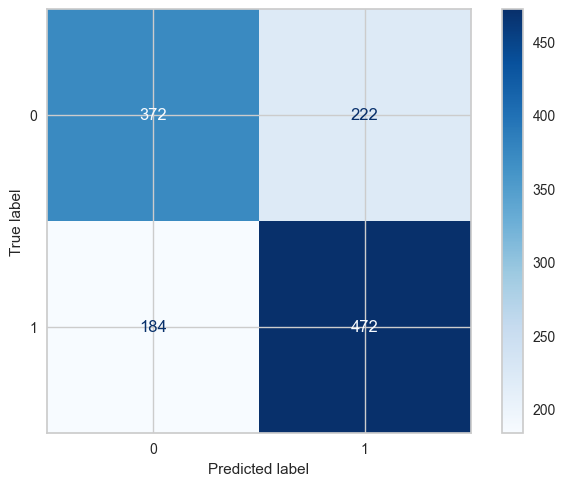

In [144]:
Train_Test_Scores(XGBClassifier(n_jobs=-1),X_train_tfidf,y_train,X_test_tfidf,y_test,True)

In [139]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)

In [ ]:
# TODO:
# 1) try DT, RF
# 2) try grid search on the best model
# 3) explore Keras/tensorflow - kaggle. Multi layer perceptron
# https://www.kaggle.com/code/fchollet/simple-deep-mlp-with-keras
# https://www.kaggle.com/code/sathianpong/3-ways-to-implement-mlp-with-keras
# https://www.kaggle.com/code/shivamchaudhary11/iris-dataset-using-mlp-classifier-in-keras/notebook
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

### Hyperparameter Tuning using GridSearch

#### Random Forest - Hyperparameter Tuning

In [ ]:
grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

# https://www.kaggle.com/code/pavansanagapati/automated-hyperparameter-tuning

In [ ]:
estimator = RandomForestClassifier()

In [ ]:
# GrifSearch
grid_clf_rf = GridSearchCV(estimator = estimator, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)

In [ ]:
grid_clf_rf.fit(X_train_vc, y_train)

In [ ]:
training_preds_rf = grid_clf_rf.predict(X_train_vc)
test_preds_rf = grid_clf_rf.predict(X_test_vc)
training_accuracy_rf = accuracy_score(y_train, training_preds)
test_accuracy_rf = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy_rf * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy_rf * 100))

In [ ]:
predictionforest = grid_clf_rf.best_estimator_.predict(X_test_vc)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc4 = accuracy_score(y_test,predictionforest)

In [ ]:
# Xgboost - Hyperparameter Tuning

In [ ]:
params_xgBoost = {
'model__min_child_weight': [1, 5],
'model__gamma': [0.5, 1, 5],
'model__subsample': [0.6,  1.0],
'model__colsample_bytree': [0.6,  1.0],
'model__max_depth': [3,  5] }

In [ ]:
estimator  = XGBClassifier(n_jobs=-1)

In [ ]:
# Using GridSearch to find the best parameters 

# GrifSearch

grid_clf_xgboost = GridSearchCV(estimator,params_xgBoost, scoring='accuracy',
                        cv=3, n_jobs=-1,verbose=3)

In [ ]:
# Fitting the model
xgboost_tuned = grid_clf_xgboost.fit(X_train_vc, y_train)

In [ ]:
# Obtaining best parameters
best_param = xgboost_tuned.best_params_
best_param

In [ ]:
training_preds = xgboost_tuned.predict(X_train_vc)
test_preds = xgboost_tuned.predict(X_test_vc)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

In [ ]:
predictionforest = xgboost_tuned.best_estimator_.predict(X_test_vc)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc4 = accuracy_score(y_test,predictionforest)

In [ ]:
################

In [ ]:
fi = clf.feature_importances_

In [ ]:
fn = vectoriser_tfidf.get_feature_names()

In [ ]:
df = pd.DataFrame({'f_imp':fi,'f_name':fn})

In [ ]:
df.sort_values('f_imp',ascending=False)

In [ ]:
clf_xg = XGBClassifier()

In [ ]:
clf_xg.fit(X_train_tfidf,y_train)

In [ ]:
y_pred = clf_xg.predict(X_test_tfidf)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
# import time
# t = time.time()
# processed_text = text_process(clean_tweets)
# print(f'Text Preprocessing complete.')
# print(f'Time Taken: {round(time.time()-t)} seconds')

In [ ]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.1, num_epochs = 250):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


In [85]:
import sklearn

In [86]:
sklearn.__version__

'1.1.3'

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay